### 다중분류

- wine data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리

In [5]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.data.shape

(178, 13)

In [6]:
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)


In [9]:
# y 데이터는 원핫 인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(wind.target)

In [10]:
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    wine_std, Y, stratify=Y, test_size=0.2, random_state=seed
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

- 모델정의/설정/학습/평가


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12,  activation='relu'),
    Dense(3, activation='softmax'),
    

])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                420       
                                                                 
 dense_4 (Dense)             (None, 12)                372       
                                                                 
 dense_5 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 다중분류

model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [19]:
hist1 = model.fit(X_train, Y_train, validation_split=0.2,
                  epochs=100, batch_size=100, verbose=0)


In [20]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0406 - accuracy: 1.0000


[0.04055867716670036, 1.0]

In [21]:
y_acc = hist1.history['accuracy']
y_vloss = hist1.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

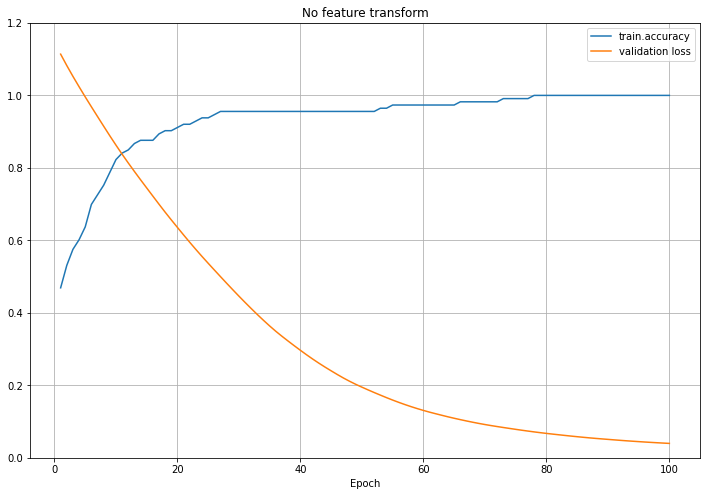

In [23]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='train.accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

In [24]:
model2 = Sequential([
    Dense(30, input_dim=13, activation='relu'),
    Dense(12,  activation='relu'),
    Dense(3, activation='softmax'),
    

])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                420       
                                                                 
 dense_7 (Dense)             (None, 12)                372       
                                                                 
 dense_8 (Dense)             (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [25]:
model2.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [26]:
hist12 = model2.fit(X_train, Y_train, validation_split=0.2,
                  epochs=500, batch_size=100, verbose=0)

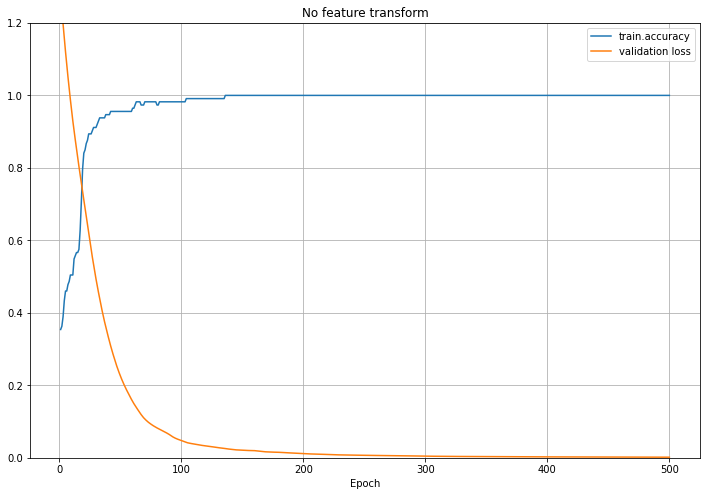

In [27]:
y_acc12 = hist12.history['accuracy']
y_vloss12 = hist12.history['val_loss']
xs = np.arange(1, len(y_acc12) + 1)
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc12, label='train.accuracy')
plt.plot(xs, y_vloss12, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

- 모델 저장 및 로드

In [29]:
model2.save('wind.h5')

In [30]:
!ls -l

total 48
drwxr-xr-x 1 root root  4096 May 17 13:39 sample_data
-rw-r--r-- 1 root root 43704 May 23 00:42 wind.h5


In [32]:
from tensorflow.keras.models import load_model
my_model = load_model('wind.h5')

In [33]:
my_model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.0023 - accuracy: 1.0000


[0.002285047434270382, 1.0]

-  실제 데이터로 테스트

In [36]:
wine_std[100], Y[100]

(array([-1.13720713, -0.23011443, -2.43634632, -0.59905169, -0.192495  ,
        -0.10433159,  0.14128858, -0.82071924, -0.33447089, -0.76049691,
         1.37126518,  0.49197446, -0.11748635]),
 array([0., 1., 0.], dtype=float32))

In [38]:
my_model.evaluate(wine_std[100].reshape(1,-1), Y[100].reshape(1,-1))

1/1 [==============================] - 0s 36ms/step - loss: 5.1020e-05 - accuracy: 1.0000


[5.1020273531321436e-05, 1.0]